# <center>`sklearn.feature_selection`</center>

**Selectors Function**

- `VarianceThreshold`: This class removes features with low variance. It allows you to select features based on a threshold for variance.

- `SelectKBest`: This class selects the K best features based on univariate statistical tests, such as chi-squared test, mutual information, or ANOVA F-value.

- `SelectPercentile`: This class selects the top percentile of features based on univariate statistical tests. You can specify the percentile of features to keep.

- `SelectFpr`, `SelectFdr`, `SelectFwe`: They use statistical tests to evaluate the importance of features.
    - `SelectFpr`: Selects features based on a **false positive rate**.
    - `SelectFdr`: Selects features based on a **false discovery rate**.
    - `SelectFwe`: Selects features based on a **family-wise error rate**.

- `GenericUnivariateSelect`: This class allows you to perform feature selection using different univariate statistical tests and strategies. You can specify the scoring function and strategy for feature selection.

- `SelectFromModel`: This class selects features based on the importance derived from a supervised learning model. You can specify a base estimator and a threshold to control the number of selected features.

- `RFE (Recursive Feature Elimination)`: This class performs recursive feature elimination by recursively eliminating less important features based on the importance of features from an underlying model.

- `RFECV (Recursive Feature Elimination with Cross-Validation)`: This class performs recursive feature elimination with cross-validation to determine the optimal number of features. It uses RFE and performs cross-validation to find the best number of features.

- `SelectFromModel`: Selects features based on the importance derived from a supervised learning model.





**Scoring Functions**

The `sklearn.feature_selection` module provides several `scoring functions` that can be used with the `SelectKBest` class to perform feature selection based on `univariate statistical tests`. Here are the scoring functions available:

- **Classification tasks:**

    - `mutual_info_classif`: This function estimates the mutual information between each feature and the target variable in a classification problem. It can handle both discrete and continuous features.

    - `f_classif`: This function performs an analysis of variance (ANOVA) test between each feature and the target variable. It assumes that the feature variables are continuous and the target variable is categorical.

    - `chi2`: This function computes chi-square statistics between each feature and the target variable. It assumes that both the feature and target variables are categorical.



- **Regression tasks**:

    - `mutual_info_regression`: This function estimates the mutual information between each feature and the target variable in a regression problem. It can handle both discrete and continuous features.

    - `f_regression`: This function performs an ANOVA test between each feature and the target variable. It assumes that both the feature and target variables are continuous.

    - `r_regression`: This function computes the coefficient of determination (R^2) between each feature and the target variable. It assumes that both the feature and target variables are continuous.

These scoring functions provide different statistical tests and measures to assess the relationship between each feature and the target variable. By using them with the SelectKBest class, you can select the best K features based on their scores or p-values, depending on the specific scoring function used.

In [ ]:
wine_url = "https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv"

`Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')`

### **Removing features with low variance**

In [ ]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Load the Wine dataset
wine_data = pd.read_csv(wine_url)

# Separate the features (X) and the target variable (y)
X = wine_data.drop('Wine', axis=1)
y = wine_data['Wine']

# Create VarianceThreshold object
threshold = 0.8  # Set the threshold for variance
variance_selector = VarianceThreshold(threshold)

# Fit the selector to the data
variance_selector.fit(X)

# Get the indices of the features to keep
feature_indices = variance_selector.get_support(indices=True)

# Get the feature names to keep
feature_names = X.columns[feature_indices]

# Create a new DataFrame with the selected features
X_selected = X[feature_names]

# Print the selected feature names
print("Selected features:")
print(feature_names)

Selected features:
Index(['Malic.acid', 'Acl', 'Mg', 'Flavanoids', 'Color.int', 'Proline'], dtype='object')


### **SelectPercentile**

Selected feature names:
0 alcohol
1 flavanoids
2 color_intensity
3 hue
4 od280/od315_of_diluted_wines
5 proline


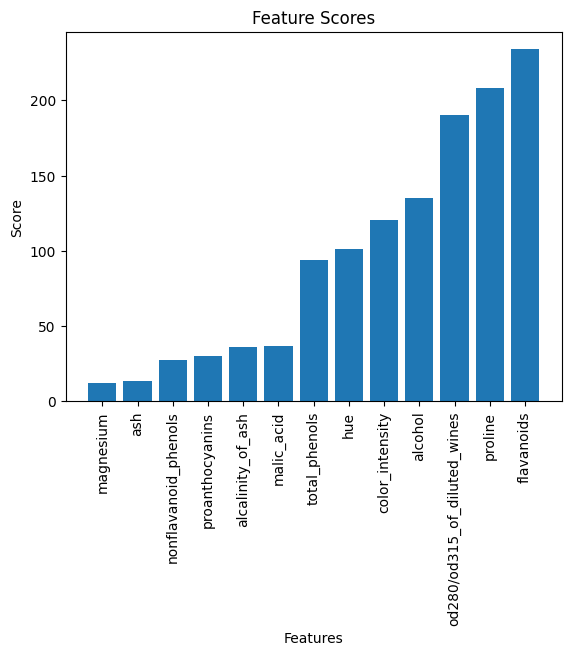



Shape of X: (178, 13)
Shape of y: (178,)
Shape of X_new: (178, 6)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Perform feature selection using SelectPercentile
selector = SelectPercentile(score_func=f_classif, percentile=50)
X_new = selector.fit_transform(X, y)

# Get the support of the selected features
feature_support = selector.get_support()

# Get the names of the selected features
selected_features = [feature_names[i] for i, support in enumerate(feature_support) if support]

# Print the selected feature names
print("Selected feature names:")
for index, name in enumerate(selected_features):
    print(index, name)

# Plot feature scores
scores = selector.scores_
plt.figure()
sorted_indices = sorted(range(len(scores)), key=lambda k: scores[k])
sorted_scores = [scores[i] for i in sorted_indices]
sorted_labels = [feature_names[i] for i in sorted_indices]
plt.bar(range(len(scores)), sorted_scores)
plt.xticks(range(len(scores)), sorted_labels, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Score')
plt.title('Feature Scores')
plt.show()

# Print the shape of the transformed feature matrix
print("\n")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Shape of X_new:", X_new.shape)

### `SelectFpr`, `SelectFdr`, `SelectFwe`

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectFpr, SelectFdr, SelectFwe
from sklearn.feature_selection import chi2, f_classif
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Perform feature selection using SelectFpr
selector_fpr = SelectFpr(score_func=chi2, alpha=0.05)
X_new_fpr = selector_fpr.fit_transform(X, y)

# Perform feature selection using SelectFdr
selector_fdr = SelectFdr(score_func=f_classif, alpha=0.05)
X_new_fdr = selector_fdr.fit_transform(X, y)

# Perform feature selection using SelectFwe
selector_fwe = SelectFwe(score_func=f_classif, alpha=0.05)
X_new_fwe = selector_fwe.fit_transform(X, y)

# Get the support of the selected features for each method
feature_support_fpr = selector_fpr.get_support()
feature_support_fdr = selector_fdr.get_support()
feature_support_fwe = selector_fwe.get_support()

# Get the names of the selected features for each method
selected_features_fpr = [feature_names[i] for i, support in enumerate(feature_support_fpr) if support]
selected_features_fdr = [feature_names[i] for i, support in enumerate(feature_support_fdr) if support]
selected_features_fwe = [feature_names[i] for i, support in enumerate(feature_support_fwe) if support]

# Sort the selected feature names in ascending order
selected_features_fpr.sort()
selected_features_fdr.sort()
selected_features_fwe.sort()

# Print the selected feature names for each method
print("Selected feature names using SelectFpr (sorted in ascending order):")
for index, name in enumerate(selected_features_fpr):
    print(index, name)

print("\nSelected feature names using SelectFdr (sorted in ascending order):")
for index, name in enumerate(selected_features_fdr):
    print(index, name)

print("\nSelected feature names using SelectFwe (sorted in ascending order):")
for index, name in enumerate(selected_features_fwe):
    print(index, name)

# Print the shape of the transformed feature matrices
print("\nShape of X_new (SelectFpr):", X_new_fpr.shape)
print("Shape of X_new (SelectFdr):", X_new_fdr.shape)
print("Shape of X_new (SelectFwe):", X_new_fwe.shape)

Selected feature names using SelectFpr (sorted in ascending order):
0 alcalinity_of_ash
1 color_intensity
2 flavanoids
3 magnesium
4 malic_acid
5 od280/od315_of_diluted_wines
6 proanthocyanins
7 proline
8 total_phenols

Selected feature names using SelectFdr (sorted in ascending order):
0 alcalinity_of_ash
1 alcohol
2 ash
3 color_intensity
4 flavanoids
5 hue
6 magnesium
7 malic_acid
8 nonflavanoid_phenols
9 od280/od315_of_diluted_wines
10 proanthocyanins
11 proline
12 total_phenols

Selected feature names using SelectFwe (sorted in ascending order):
0 alcalinity_of_ash
1 alcohol
2 ash
3 color_intensity
4 flavanoids
5 hue
6 magnesium
7 malic_acid
8 nonflavanoid_phenols
9 od280/od315_of_diluted_wines
10 proanthocyanins
11 proline
12 total_phenols

Shape of X_new (SelectFpr): (178, 9)
Shape of X_new (SelectFdr): (178, 13)
Shape of X_new (SelectFwe): (178, 13)


**NOTE**

we cannot use `mutual_info_classif` as scoring func in the code above as this  function does not provide p-values, which are required for the `SelectFwe` feature selection method.

- `alpha` parameter: it represents the significance level or the threshold for determining the importance of features. In this case, an alpha value of `0.05` is commonly used, which means that features with p-values less than `0.05` are considered statistically significant and selected as important features.

## **Univariate feature selection**

`GenericUnivariateSelect`

```python

# Define a custom scoring function
def custom_score_func(X, y):
    # Calculate the score for each feature
    scores = <custom scoring logic>
    return scores


```

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names


# coustom function
def custom_score_func(X, y):
    # Calculate the absolute differences between feature values and target variable
    feature_diffs = np.abs(X - np.mean(y))
    # Sum the differences across each feature
    feature_scores = np.sum(feature_diffs, axis=0)
    return feature_scores

# Mutual Information:
def mutual_info_score(X, y):
    scores = mutual_info_classif(X, y)
    return scores

# ANOVA F-value:
def f_value_score(X, y):
    f_values, _ = f_classif(X, y)
    return f_values


# Gini Index:
def gini_index_score(X, y):
    rf = RandomForestClassifier()
    rf.fit(X, y)
    feature_importances = rf.feature_importances_
    scores = 1 - feature_importances
    return scores

# Chi-squared:
def chi2_score(X, y):
    chi2_values, _ = chi2(X, y)
    return chi2_values

# Scoring functions
scoring_functions = [custom_score_func, mutual_info_score, f_value_score, gini_index_score, chi2_score]

for i, score_func in enumerate(scoring_functions):
    # Create an instance of GenericUnivariateSelect with the scoring function
    selector = GenericUnivariateSelect(score_func=score_func, mode='k_best', param=5)
    X_new = selector.fit_transform(X, y)

    # Get the support of the selected features
    feature_support = selector.get_support()

    # Get the names of the selected features
    selected_features = [feature_names[i] for i, support in enumerate(feature_support) if support]

    # Print the selected feature names
    print(f"\nSelected feature names using {scoring_functions[i].__name__}:")
    for index, name in enumerate(selected_features):
        print(index, name)

    # Print the shape of the transformed feature matrix
    print("Shape of X_new:", X_new.shape)


Selected feature names using custom_score_func:
0 alcohol
1 alcalinity_of_ash
2 magnesium
3 color_intensity
4 proline
Shape of X_new: (178, 5)

Selected feature names using mutual_info_score:
0 alcohol
1 flavanoids
2 color_intensity
3 od280/od315_of_diluted_wines
4 proline
Shape of X_new: (178, 5)

Selected feature names using f_value_score:
0 alcohol
1 flavanoids
2 color_intensity
3 od280/od315_of_diluted_wines
4 proline
Shape of X_new: (178, 5)

Selected feature names using gini_index_score:
0 ash
1 alcalinity_of_ash
2 magnesium
3 nonflavanoid_phenols
4 proanthocyanins
Shape of X_new: (178, 5)

Selected feature names using chi2_score:
0 alcalinity_of_ash
1 magnesium
2 flavanoids
3 color_intensity
4 proline
Shape of X_new: (178, 5)


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Load the Wine dataset
wine_df = pd.read_csv(wine_url)

# Separate the features (X) and the target variable (y)
X = wine_df.drop('Wine', axis=1)
y = wine_df['Wine']

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
feature_names = X.columns[feature_indices]

# Print the selected feature names
print("Selected feature names:")
for index, name in enumerate(feature_names):
    print(index, name)

# Print the shape of the transformed feature matrix
print("\n")
print("Shape of the dataframe:", wine_df.shape)
print("Shape of X_new:", X_new.shape)

Selected feature names:
0 Alcohol
1 Flavanoids
2 Color.int
3 OD
4 Proline


Shape of the dataframe: (178, 14)
Shape of X_new: (178, 5)


The `SelectKBest` function is then used for `feature selection` with the `f_classif` scoring function, which computes the `ANOVA` `F-value` between each feature and the target variable.

In this example, we select the `top 5` features (`k=5`), but you can adjust this value according to your needs.

The fit_transform method is called to perform the feature selection and transform the feature matrix. The resulting transformed feature matrix is stored in X_new, and its shape is printed.

## **Recursive feature elimination**

### **RFE**

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load the Wine dataset
wine_df = pd.read_csv(wine_url)

# Separate the features (X) and the target variable (y)
X = wine_df.drop('Wine', axis=1)
y = wine_df['Wine']

# Create a base model for RFE
base_model = LogisticRegression(solver='liblinear')

# Perform Recursive Feature Elimination
rfe_selector = RFE(estimator=base_model, n_features_to_select=5)
X_new = rfe_selector.fit_transform(X, y)

# Get the support of the selected features
feature_support = rfe_selector.support_

# Get the names of the selected features
feature_names = X.columns[feature_support]

# Print the selected feature names
print("Selected feature names:")
for index, name in enumerate(feature_names):
    print(index, name)

# Print the shape of the transformed feature matrix
print("\n")
print("Shape of the dataframe:", wine_df.shape)
print("Shape of X_new:", X_new.shape)

Selected feature names:
0 Ash
1 Flavanoids
2 Color.int
3 Hue
4 OD


Shape of the dataframe: (178, 14)
Shape of X_new: (178, 5)


### **RFE with cross-validation**

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Load the Wine dataset
wine_df = pd.read_csv(wine_url)

# Separate the features (X) and the target variable (y)
X = wine_df.drop('Wine', axis=1)
y = wine_df['Wine']

# Create a base model for RFE
base_model = LogisticRegression(solver='liblinear')

# Create a cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# Perform Recursive Feature Elimination with Cross-Validation
rfecv_selector = RFECV(estimator=base_model, cv=cv)
X_new = rfecv_selector.fit_transform(X, y)

# Get the support of the selected features
feature_support = rfecv_selector.support_

# Get the names of the selected features
feature_names = X.columns[feature_support]

# Print the selected feature names
print("Selected feature names:")
for index, name in enumerate(feature_names):
    print(index, name)

# Print the shape of the transformed feature matrix
print("\n")
print("Shape of the dataframe:", wine_df.shape)
print("Shape of X_new:", X_new.shape)

Selected feature names:
0 Alcohol
1 Malic.acid
2 Ash
3 Acl
4 Mg
5 Phenols
6 Flavanoids
7 Nonflavanoid.phenols
8 Proanth
9 Color.int
10 Hue
11 OD
12 Proline


Shape of the dataframe: (178, 14)
Shape of X_new: (178, 13)


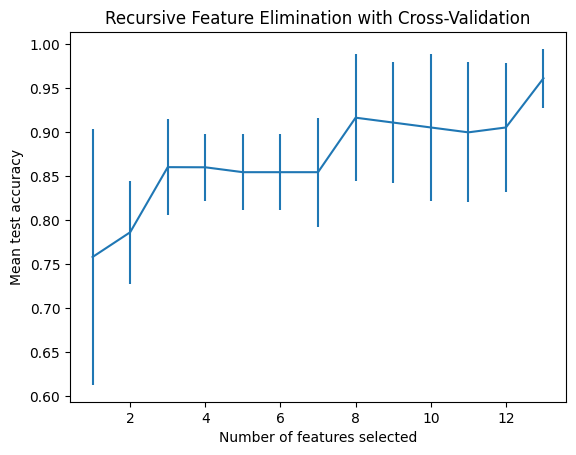

In [ ]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
        range(1, len(rfecv_selector.cv_results_['mean_test_score']) + 1),
        rfecv_selector.cv_results_['mean_test_score'],
        yerr=rfecv_selector.cv_results_['std_test_score'],
    )
plt.title("Recursive Feature Elimination with Cross-Validation")
plt.show()

**On sklearns Classification dataset**

Optimal number of features: 3


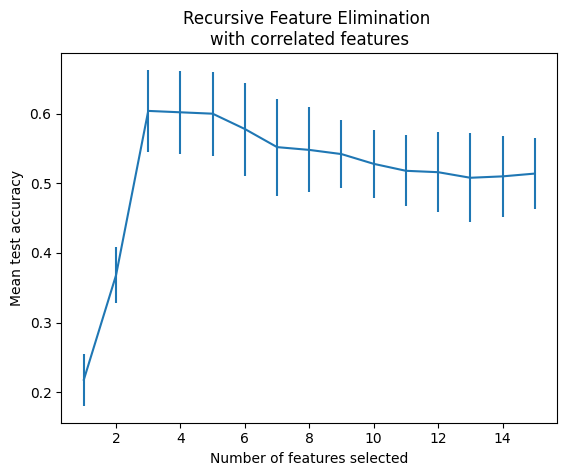

In [ ]:
# Data generation
from sklearn.datasets import make_classification

# Model training and selection
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

X, y = make_classification(
    n_samples=500,
    n_features=15,
    n_informative=3,
    n_redundant=2,
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
    class_sep=0.8,
    random_state=0,
)


min_features_to_select = 1  # Minimum number of features to consider
clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)

rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt

n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

From the plot above one can further notice a plateau of equivalent scores (similar mean value and overlapping errorbars) for 3 to 5 selected features.

This is the result of introducing correlated features. Indeed, the optimal model selected by the `RFE` can lie within this range, depending on the cross-validation technique. The test accuracy decreases above 5 selected features, this is, keeping non-informative features leads to over-fitting and is therefore detrimental for the statistical performance of the models.

## **Feature selection using SelectFromModel**

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Create a Random Forest Classifier
clf = RandomForestClassifier()

# Create an instance of SelectFromModel
selector = SelectFromModel(estimator=clf)

# Fit the selector to the data
selector.fit(X, y)

# Get the support of the selected features
feature_support = selector.get_support()

# Get the names of the selected features
selected_features = [feature_names[i] for i, support in enumerate(feature_support) if support]

# Print the selected feature names
print("Selected feature names:")
for index, name in enumerate(selected_features):
    print(index, name)

# Transform the feature matrix to include only the selected features
X_new = selector.transform(X)

# Print the shape of the transformed feature matrix
print("Shape of X_new:", X_new.shape)

Selected feature names:
0 alcohol
1 flavanoids
2 color_intensity
3 hue
4 od280/od315_of_diluted_wines
5 proline
Shape of X_new: (178, 6)


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Assuming X, y, and feature_names are defined
# Assuming estimator is defined, if not, define it. Here, we use LinearRegression as an example
estimator = LinearRegression()

# Create an instance of SelectKBest with mutual_info_regression scoring
selector_mutual_info_regression = SelectKBest(score_func=mutual_info_regression, k=5)
X_new_mutual_info_regression = selector_mutual_info_regression.fit_transform(X, y)
selected_features_mutual_info_regression = [feature_names[i] for i in selector_mutual_info_regression.get_support(indices=True)]

# Define custom scoring function
def r2_scores(X, y):
    scores = []
    for column in X.T:
        X_column = column.reshape(-1, 1)
        score = r2_score(y, estimator.fit(X_column, y).predict(X_column))
        scores.append(score)
    return np.array(scores)

# Create an instance of SelectKBest with r2_scores scoring
selector_r2_scores = SelectKBest(score_func=r2_scores, k=5)
X_new_r2_scores = selector_r2_scores.fit_transform(X, y)
selected_features_r2_scores = [feature_names[i] for i in selector_r2_scores.get_support(indices=True)]

# Print the selected feature names for each scoring function
print("\nSelected feature names using mutual_info_regression:")
for index, name in enumerate(selected_features_mutual_info_regression):
    print(index, name)

print("\nSelected feature names using r2_scores:")
for index, name in enumerate(selected_features_r2_scores):
    print(index, name)

# Print the shape of the transformed feature matrices
print("\nShape of X_new (mutual_info_regression):", X_new_mutual_info_regression.shape)
print("Shape of X_new (r2_scores):", X_new_r2_scores.shape)



Selected feature names using mutual_info_regression:
0 alcohol
1 flavanoids
2 color_intensity
3 od280/od315_of_diluted_wines
4 proline

Selected feature names using r2_scores:
0 total_phenols
1 flavanoids
2 hue
3 od280/od315_of_diluted_wines
4 proline

Shape of X_new (mutual_info_regression): (178, 5)
Shape of X_new (r2_scores): (178, 5)
